# MNIST Tutorial
In this tutorial, we will first use `tensorflow` and `keras` to build a simple fully connected neural network to perform hand written digit classification on MNIST dataset. Then we will dive into the details of how to write a neural network from scratch. Basically, we will re-implement the functionality of `keras` from scratch, without the help of tensorflow or any machine learning frameworks.

## Keras
Step one, let's build a simple sequential model using `keras` and we will see how powerful `keras` is. It should only take us less than 10 lines of code to build a 3-layer fully connected network.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.regularizers import l2

from matplotlib import pyplot as plt

import numpy as np


# Build the neural network!
model = Sequential()
model.add(Dense(300, input_dim=28*28, kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(50, input_dim=300, kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(10, input_dim=100))
model.add(Activation('softmax'))

Using TensorFlow backend.


Now we will grab MNIST hand-written digit data through `keras`.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's visualize them and see how do the data look like.

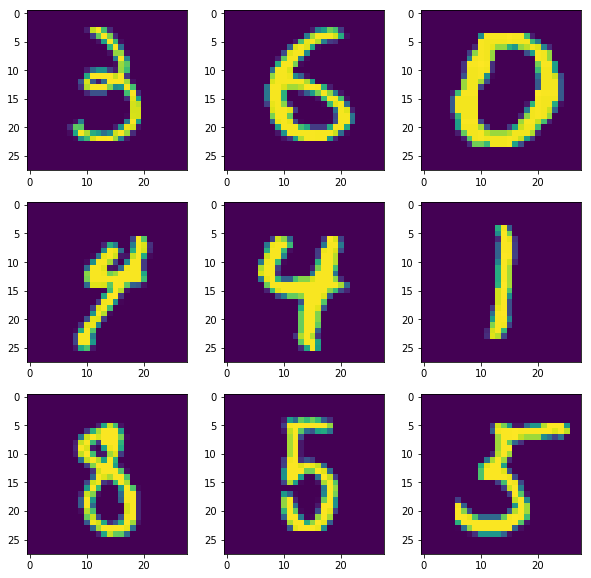

In [3]:
from utils import visualize_img_data

visualize_img_data(x_train)

Now here comes the magic of `keras`. We can train the network using as few as 3 lines of code!

In [4]:
from utils import plot_histo_chart


# Massage the data first
N, H, W = x_train.shape
x = x_train.reshape((N,H*W)).astype('float') / 255
y = to_categorical(y_train, num_classes=10)

# Define optimizer
sgd = SGD(lr=0.01, decay=1e-4, momentum=0.9)

# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train it
plot_histo_chart(model.fit(x, y, validation_split=0.20, epochs=10, batch_size=50))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 66us/step - loss: 1.9893 - acc: 0.8827 - val_loss: 0.6174 - val_acc: 0.9264
Epoch 2/10
48000/48000 [==============================] - 3s 63us/step - loss: 0.5123 - acc: 0.9288 - val_loss: 0.4394 - val_acc: 0.9407
Epoch 3/10
48000/48000 [==============================] - 3s 57us/step - loss: 0.4354 - acc: 0.9366 - val_loss: 0.4118 - val_acc: 0.9430
Epoch 4/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.4027 - acc: 0.9437 - val_loss: 0.3813 - val_acc: 0.9497
Epoch 5/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.3852 - acc: 0.9459 - val_loss: 0.3779 - val_acc: 0.9510
Epoch 6/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.3693 - acc: 0.9503 - val_loss: 0.3589 - val_acc: 0.9545
Epoch 7/10
48000/48000 [==============================] - 3s 63us/step - loss: 0.3579 - acc: 0.9519 - val_loss: 0.3433 - val_acc

AttributeError: 'Figure' object has no attribute 'subplot'

<Figure size 720x432 with 0 Axes>